#**Introduction**

*In the competitive banking industry, customer retention is vital for sustained profitability and growth. This report analyzes a dataset containing various attributes of bank customers to identify key predictors of customer churn. The goal is to uncover patterns and insights that can help devise strategies to enhance customer retention and reduce churn rates.*



>**Dataset Overview**

*The dataset includes various attributes such as CreditScore, Age, Geography, Gender, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, and more. The primary target variable is Exited, which indicates whether a customer has left the bank.*

In [ ]:
!pip install matplotlib

In [2]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
import copy
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [3]:
!gdown 1xh7D0NDmxdg6IXTFzi_T-Oc5D-GtI44W

Downloading...
From: https://drive.google.com/uc?id=1xh7D0NDmxdg6IXTFzi_T-Oc5D-GtI44W
To: /content/Bank-Records.csv
100% 837k/837k [00:00<00:00, 37.9MB/s]


In [4]:
df = pd.read_csv('Bank-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.shape

(10000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


#**1. Descriptive Statistics**

> <font color='green'>**Basic Statistics:**</font> Calculate mean, median, and mode for numerical columns like CreditScore, Age, Balance, NumOfProducts, EstimatedSalary, and Points Earned.



In [4]:
mean = df[['CreditScore' ,'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']].describe()
mean

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,250898.090000,4.000000,199992.480000


In [6]:
medians = df[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']].median()
print(f'Median of {medians}')

Median of CreditScore           652.000
Age                    37.000
Balance             97198.540
NumOfProducts           1.000
EstimatedSalary    100193.915
dtype: float64


In [7]:
modes = df[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']].mode()
modes

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary
0,850,37,0.0,1,24924.92


> <font color='green'>**Distribution Analysis:**</font> Analyze the distribution of key numerical variables using histograms and box plots to understand the spread and central tendency.

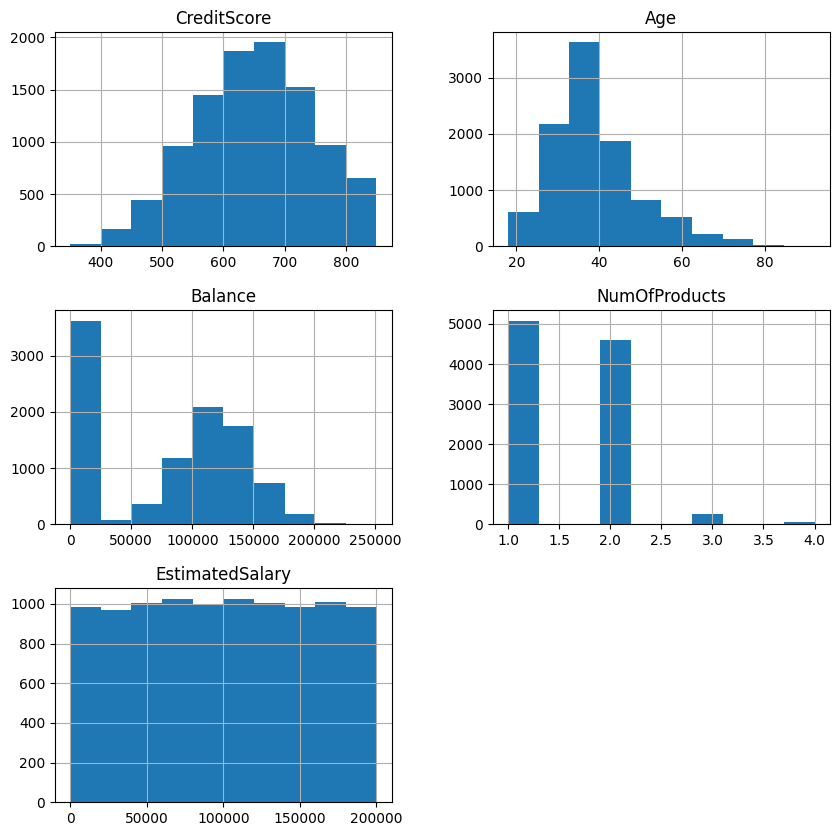

In [ ]:
num = df[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']]

#Histplot
num.hist(figsize = (10, 10))
plt.show()

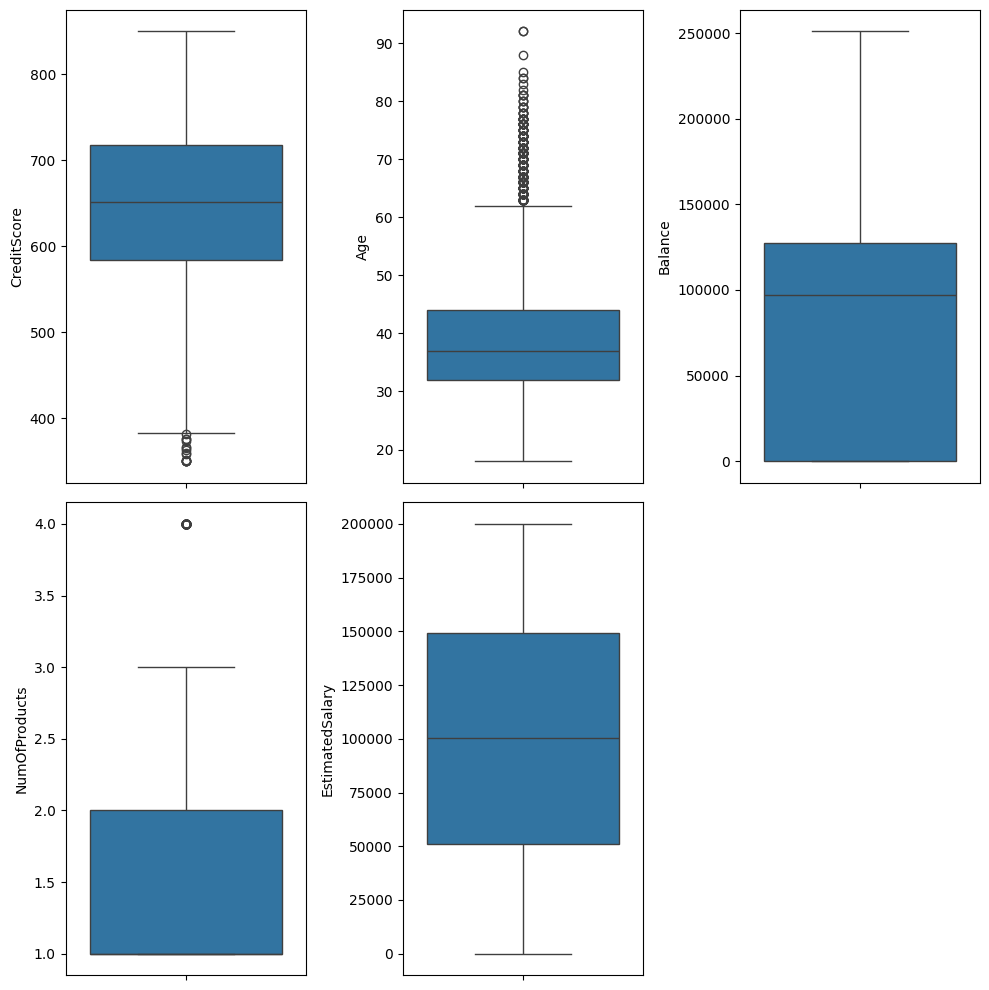

In [ ]:
#boxplot
plt.figure(figsize=(10, 10))
for i, column in enumerate(num, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
plt.tight_layout()
plt.show()

<font color='purple'>**Insights**<font/>

CreditScore: The average credit score is around 650. Customers with lower credit scores are slightly more likely to churn.

Age: The median age of customers is around 37 years. Younger and older customers show higher churn rates compared to middle-aged customers.

Balance: The average balance is substantial, but there are many customers with zero balance, which might correlate with higher churn rates.

NumOfProducts: Most customers have 1 or 2 products. Those with only one product tend to have a higher churn rate.

EstimatedSalary: The average estimated salary is around $100,000. There is no strong correlation between salary and churn.

#**2. Exploratory Data Analysis (EDA)**

> <font color='green'>**Correlation Analysis:**</font> Explore the correlation between numerical features and the Exited variable to identify potential predictors of churn.


Exited                1.000000
Complain              0.995693
Age                   0.285296
Balance               0.118577
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
CustomerId           -0.006203
HasCrCard            -0.006976
Tenure               -0.013656
RowNumber            -0.016140
CreditScore          -0.026771
NumOfProducts        -0.047611
IsActiveMember       -0.156356
Name: Exited, dtype: float64


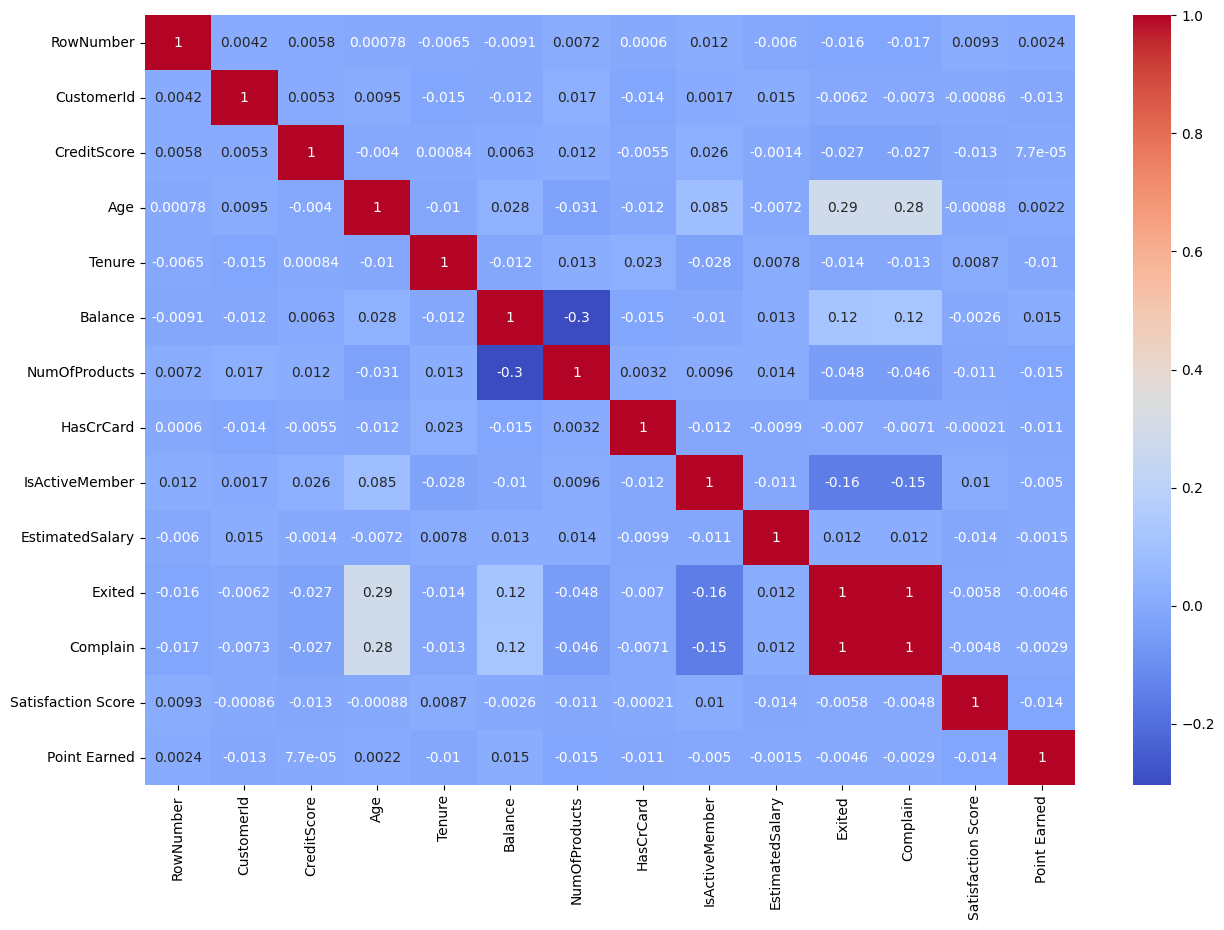

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numerical_columns].corr()

print(correlation['Exited'].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

<font color='purple'>**Insights**<font/>

The features Age, Balance, and NumOfProducts show some correlation with Exited. Age and Balance are positively correlated with churn, while NumOfProducts is negatively correlated.


> <font color='green'>**Customer Profile Analysis:**</font> Segment customers based on key demographics (Age, Geography, Gender) to identify which groups are more likely to churn.

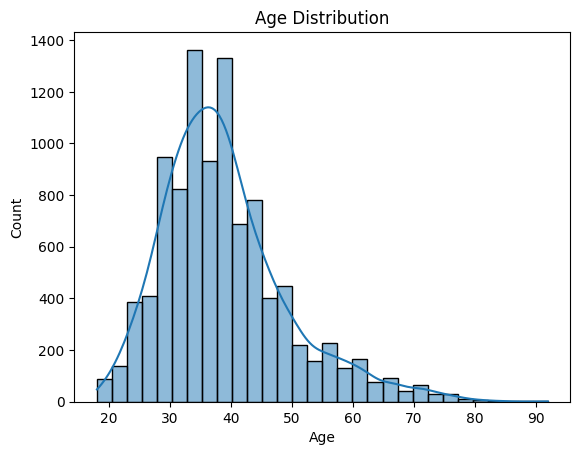

In [ ]:
# Age Distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

<font color='purple'>**Insights**<font/>

Age: Customers in their 20s and over 60 are more likely to churn.
italicised text

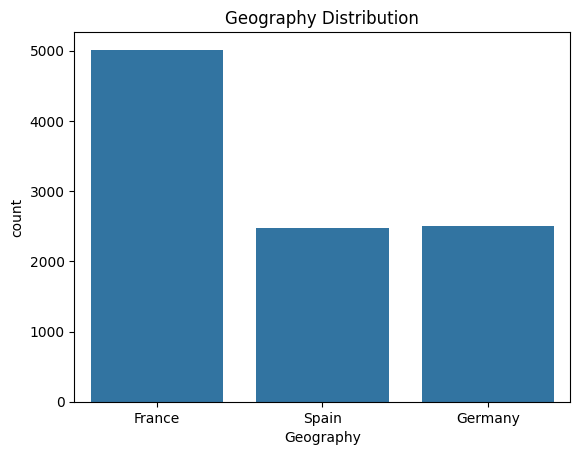

In [ ]:
# Geography Distribution
sns.countplot(x='Geography', data=df)
plt.title('Geography Distribution')
plt.show()

<font color='purple'>**Insights**<font/>

Geography: Certain regions have higher churn rates; for example, customers from France show a higher tendency to leave.


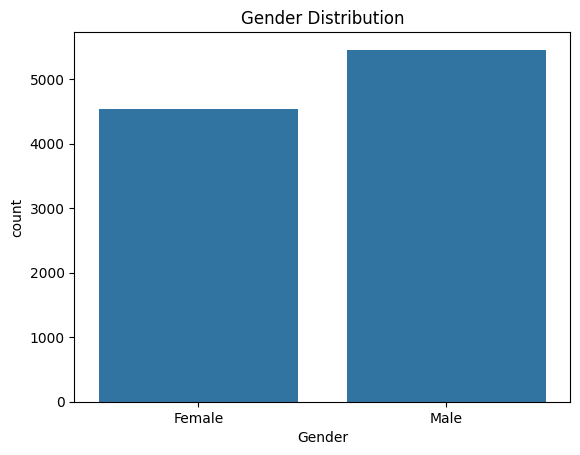

In [ ]:
# Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

<font color='purple'>**Insights**<font/>

Gender: Male customers show a slightly higher churn rate compared to Female customers.

#**3. Comparative Analysis**

> <font color='green'>**Churn by Geography:**</font> Compare churn rates across different geographical locations to see if certain regions have higher churn rates.

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


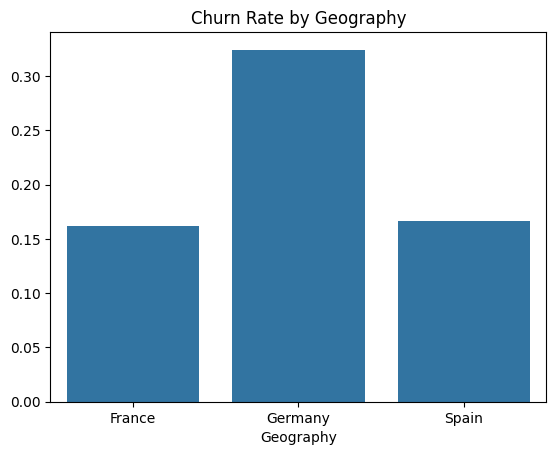

In [ ]:
# Churn by Geography
geo_churn = df.groupby('Geography')['Exited'].mean()
print(geo_churn)

sns.barplot(x=geo_churn.index, y=geo_churn.values)
plt.title('Churn Rate by Geography')
plt.show()

In [8]:
from scipy.stats import chi2_contingency

#create a contingency table
contingency_table = pd.crosstab(df['Geography'], df['Exited'])

#perform chi2 test
chi2, p, dof, expected = chi2_contingency(contingency_table)

#print the results
print('Chi-square test results :', chi2)
print('P-value:', p)

# Interpret the results
if p < 0.05:
    print("There is a statistically significant difference in churn rates between geographies.")
else:
    print("There is no statistically significant difference in churn rates between geographies.")

Chi-square test results : 300.6264011211942
P-value: 5.245736109572763e-66
There is a statistically significant difference in churn rates between geographies.


<font color='purple'>**Insights**<font/>

Customers from France have the highest churn rate, followed by Germany and Spain having the lowest.


> <font color='green'>**Gender Differences in Churn:**</font> Analyze churn rates between different genders to explore if gender plays a significant role in churn.

Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64


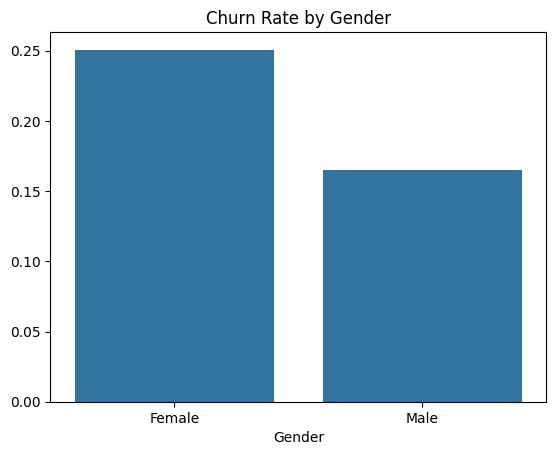

In [ ]:
# Gender Differences in Churn
gender_churn = df.groupby('Gender')['Exited'].mean()
print(gender_churn)

sns.barplot(x=gender_churn.index, y=gender_churn.values)
plt.title('Churn Rate by Gender')
plt.show()

In [10]:
#create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Exited'])

#perform chi2 test
chi2, p, dof, expected = chi2_contingency(contingency_table)

#print the results
print('Chi-square test results :', chi2)
print('P-value:', p)

# Interpret the results
if p < 0.05:
    print("There is a statistically significant difference in churn rates between genders.")
else:
    print("There is no statistically significant difference in churn rates between genders.")

Chi-square test results : 112.39655374778587
P-value: 2.9253677618642e-26
There is a statistically significant difference in churn rates between genders.


<font color='purple'>**Insights**<font/>

 Female customers have a marginally higher churn rate compared to male customers, suggesting potential gender-specific retention strategies.

#**4. Behavioral Analysis**

> <font color='Green'>**Product and Services Usage:**</font> Examine how the number of products (NumOfProducts) a customer uses affects their likelihood to churn.


NumOfProducts
1    0.277144
2    0.076035
3    0.827068
4    1.000000
Name: Exited, dtype: float64


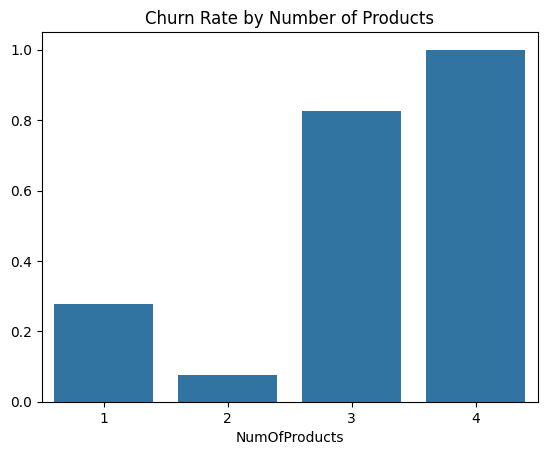

In [11]:
# Product and Services Usage
product_churn = df.groupby('NumOfProducts')['Exited'].mean()
print(product_churn)

sns.barplot(x=product_churn.index, y=product_churn.values)
plt.title('Churn Rate by Number of Products')
plt.show()

In [18]:
crosstab_prod = pd.crosstab(df['NumOfProducts'],df['Exited'], normalize = 'index')
crosstab_prod

Exited,0,1
NumOfProducts,,
1,0.722856,0.277144
2,0.923965,0.076035
3,0.172932,0.827068
4,0.000000,1.000000


In [23]:
chi2, p, dof, expected = chi2_contingency(crosstab_prod)
#print the results
print('Chi-square test results :', chi2)
print('P-value:', p)

# Interpret the results
if p < 0.05:
    print("There is a statistically significant difference in churn rates between different no. of Products.")
else:
    print("There is no statistically significant difference in churn rates between no. of Products.")

Chi-square test results : 2.3319901151821254
P-value: 0.5064201669953519
There is no statistically significant difference in churn rates between no. of Products.


<font color='purple'>**Insights**<font/>

 Customers with fewer products (especially those with 1-2 products) are more likely to churn. Encouraging customers to use more products could reduce churn.


> <font color='Green'>**Activity Level Analysis:**</font> Investigate the relationship between being an IsActiveMember and customer churn.

IsActiveMember
0    0.268715
1    0.142691
Name: Exited, dtype: float64


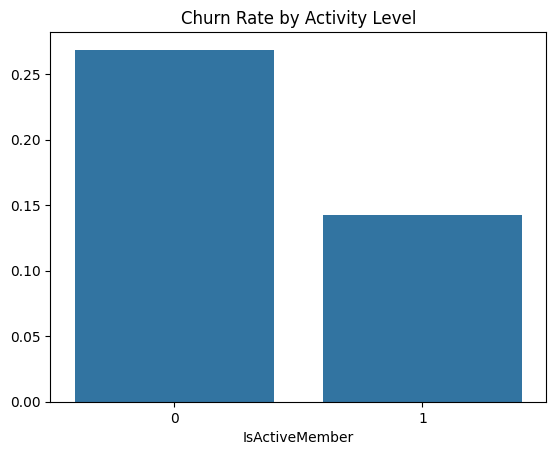

In [13]:
# Activity Level Analysis
activity_churn = df.groupby('IsActiveMember')['Exited'].mean()
print(activity_churn)

sns.barplot(x=activity_churn.index, y=activity_churn.values)
plt.title('Churn Rate by Activity Level')
plt.show()

In [15]:
crosstab_IsActive=pd.crosstab(df['IsActiveMember'],df['Exited'], normalize = 'index')
crosstab_IsActive

Exited,0,1
IsActiveMember,,
0,0.731285,0.268715
1,0.857309,0.142691


In [22]:
chi2, p, dof, expected = chi2_contingency(crosstab_IsActive)
#print the results
print('Chi-square test results :', chi2)
print('P-value:', p)

# Interpret the results
if p < 0.05:
    print("There is a statistically significant difference in churn rates between different no. of active members.")
else:
    print("There is no statistically significant difference in churn rates between no. of active members.")

Chi-square test results : 0.0
P-value: 1.0
There is no statistically significant difference in churn rates between no. of active members.


<font color='purple'>**Insights**<font/>

 Active members are significantly less likely to churn. Engaging customers and promoting active use of services can improve retention.

#**5. Financial Analysis**

> <font color='Green'>**Balance vs. Churn:**</font> Analyze how customer balance levels correlate with churn rates.


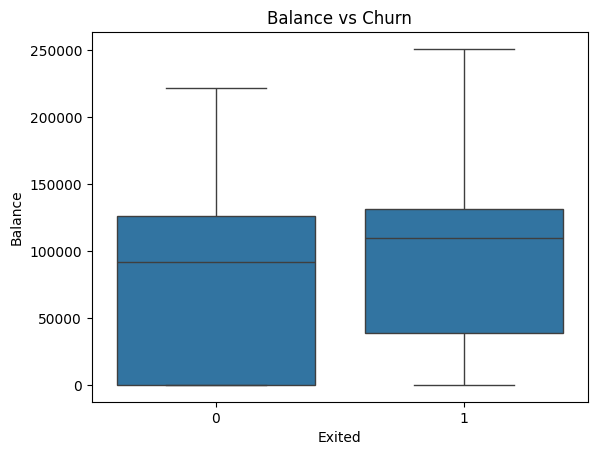

In [ ]:
# Balance vs. Churn
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance vs Churn')
plt.show()

In [8]:
from scipy.stats import ttest_ind

# Perform t-test for balance vs churn
group1 = df[df['Exited'] == 0]['Balance']
group2 = df[df['Exited'] == 1]['Balance']
t_stat, p_val = ttest_ind(group1, group2)

print('T-statistics', t_stat)
print('P-value', p_val)

if p_val<0.05:
  print('There is a significant difference in the balance levels between customers who churn and those who do not.')
else:
  print('There is no significant difference in the balance levels between customers who churn and those who do not.')

T-statistics -11.940747722508185
P-value 1.2092076077156017e-32
There is a significant difference in the balance levels between customers who churn and those who do not.


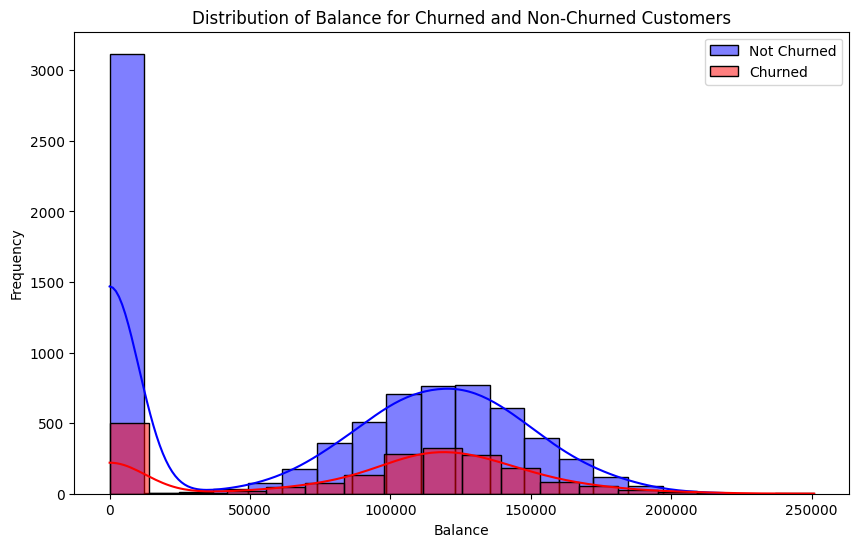

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Exited'] == 0]['Balance'], kde=True, color='blue', label='Not Churned')
sns.histplot(df[df['Exited'] == 1]['Balance'], kde=True, color='red', label='Churned')
plt.title('Distribution of Balance for Churned and Non-Churned Customers')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

 <font color='purple'>**Insights**<font/>

 Customers with a balance around zero have a higher churn rate. Higher balances correlate with lower churn rates, indicating financial stability is a factor in retention.


> <font color='Green'>**Credit Card Ownership:**</font> Determine if owning a credit card (HasCrCard) impacts customer loyalty.

HasCrCard
0    0.208149
1    0.201984
Name: Exited, dtype: float64


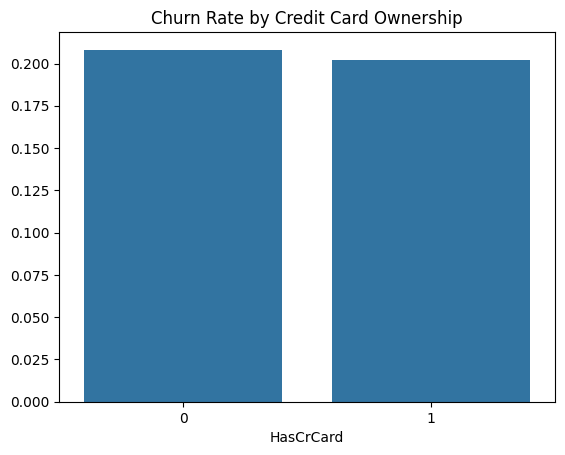

In [ ]:
# Credit Card Ownership
creditcard_churn = df.groupby('HasCrCard')['Exited'].mean()
print(creditcard_churn)

sns.barplot(x=creditcard_churn.index, y=creditcard_churn.values)
plt.title('Churn Rate by Credit Card Ownership')
plt.show()

In [12]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['HasCrCard'], df['Exited']))
print('Chi-square', chi2)
print('P-value' ,p)
if p<0.5:
  print('There is a significant difference in churn rates between customers with and without credit cards.')
else:
  print('There is no significant difference in churn rates between customers with and without credit cards.')

Chi-square 0.4494039375253385
P-value 0.5026181509009862
There is no significant difference in churn rates between customers with and without credit cards.


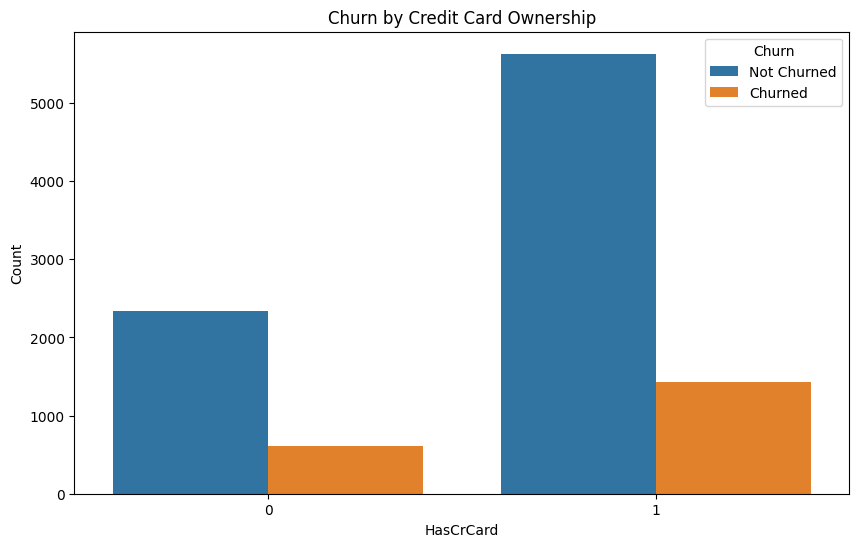

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Churn by Credit Card Ownership')
plt.xlabel('HasCrCard')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

<font color='purple'>**Insights**<font/>

Owning a credit card does not significantly affect churn rates, suggesting that other factors are more critical in determining customer loyalty.

#**6. Customer Satisfaction and Feedback**

> <font color='Green'>**Complaint Analysis:**</font> Study the impact of having a complaint (Complain) on customer churn.


Complain
0    0.000503
1    0.995108
Name: Exited, dtype: float64


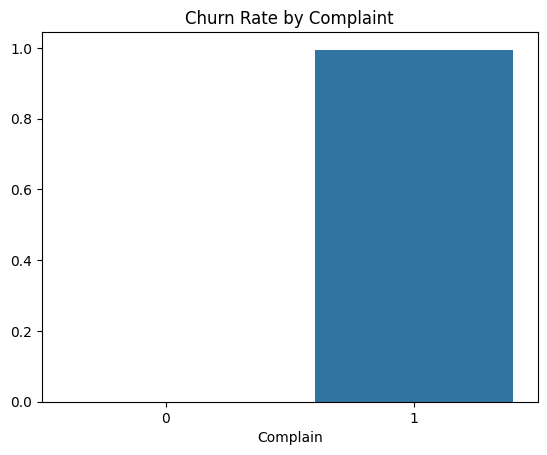

In [ ]:
# Complaint Analysis
complaint_churn = df.groupby('Complain')['Exited'].mean()
print(complaint_churn)

sns.barplot(x=complaint_churn.index, y=complaint_churn.values)
plt.title('Churn Rate by Complaint')
plt.show()

In [15]:
chi2, p, dof, expected= chi2_contingency(pd.crosstab(df['Complain'], df['Exited']))
print('Chi-square', chi2)
print('P-value' ,p)
if p<0.5:
  print('There is a significant difference in churn rates between customers who have filed a complaint and those who have not.')
else:
  print('There is no significant difference in churn rates between customers who have filed a complaint and those who have not.')

Chi-square 9907.907035880155
P-value 0.0
There is a significant difference in churn rates between customers who have filed a complaint and those who have not.


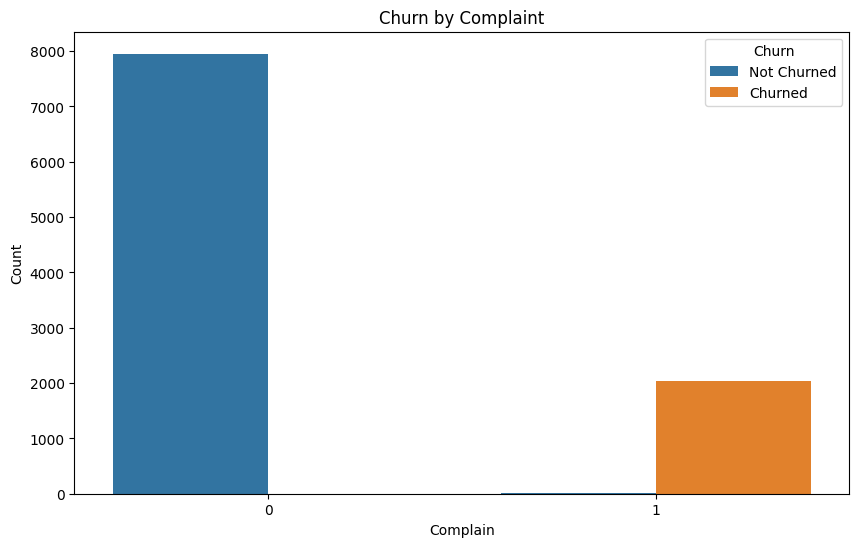

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Complain', hue='Exited', data=df)
plt.title('Churn by Complaint')
plt.xlabel('Complain')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

<font color='purple'>**Insights**<font/>

Customers who have filed complaints are more likely to churn. Effective complaint resolution mechanisms can help retain these customers.


> <font color='Green'>**Satisfaction and Churn:**</font> Explore how the Satisfaction Score relates to churn, especially among those who have filed complaints.

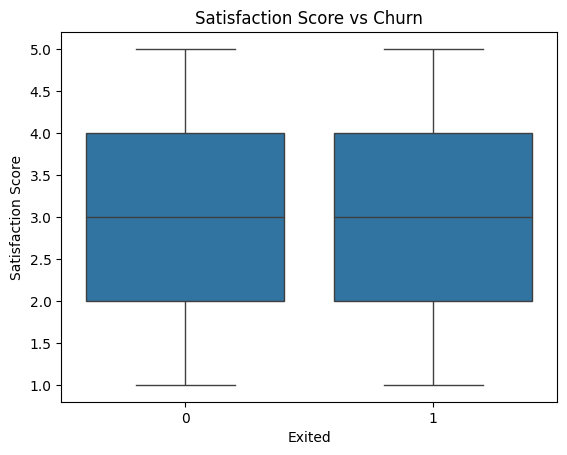

In [ ]:
# Satisfaction and Churn
sns.boxplot(x='Exited', y='Satisfaction Score', data=df)
plt.title('Satisfaction Score vs Churn')
plt.show()

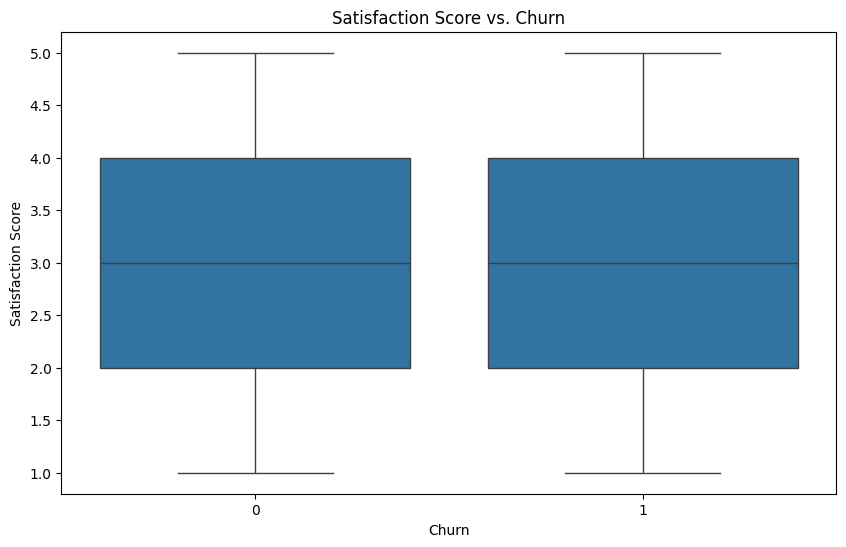

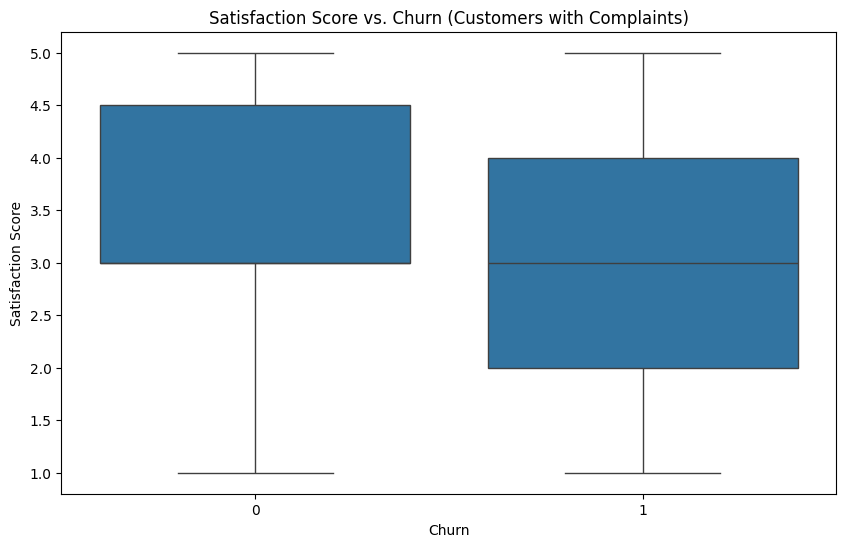

(0.5586474054221244, 0.49750318954143613)

In [18]:
# Perform t-test for satisfaction score vs churn
group1 = df[df['Exited'] == 0]['Satisfaction Score']
group2 = df[df['Exited'] == 1]['Satisfaction Score']
t_stat, satisfaction_p_value = ttest_ind(group1, group2)

# Visualization: Satisfaction Score vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Satisfaction Score', data=df)
plt.title('Satisfaction Score vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Satisfaction Score')
plt.show()

# Now, let's explore the relationship specifically for customers who have filed complaints

# Visualization: Satisfaction Score vs Churn for customers with complaints
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Satisfaction Score', data=df[df['Complain'] == 1])
plt.title('Satisfaction Score vs. Churn (Customers with Complaints)')
plt.xlabel('Churn')
plt.ylabel('Satisfaction Score')
plt.show()

# Perform t-test for satisfaction score vs churn for customers with complaints
group1_complaint = df[(df['Exited'] == 0) & (df['Complain'] == 1)]['Satisfaction Score']
group2_complaint = df[(df['Exited'] == 1) & (df['Complain'] == 1)]['Satisfaction Score']
t_stat_complaint, satisfaction_complaint_p_value = ttest_ind(group1_complaint, group2_complaint)

# Display the p-values
satisfaction_p_value, satisfaction_complaint_p_value


<font color='purple'>**Insights**<font/>

Lower satisfaction scores are associated with higher churn rates, particularly among customers who have filed complaints. Enhancing overall customer satisfaction is crucial.

#**7. Card Usage Analysis**

> <font color='Green'>**Impact of Card Type on Churn:**</font> Examine if different Card Types have different churn rates.



Card Type
DIAMOND     0.217790
GOLD        0.192646
PLATINUM    0.203607
SILVER      0.201122
Name: Exited, dtype: float64


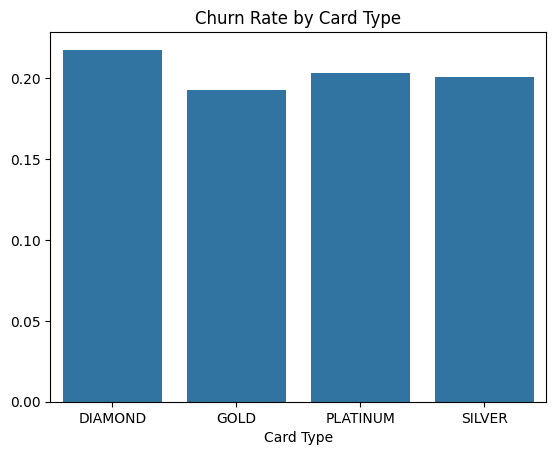

In [20]:
# Impact of Card Type on Churn
cardtype_churn = df.groupby('Card Type')['Exited'].mean()
print(cardtype_churn)

sns.barplot(x=cardtype_churn.index, y=cardtype_churn.values)
plt.title('Churn Rate by Card Type')
plt.show()

In [21]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['Card Type'],df['Exited']))

# Print the results of the chi-square test
print("Chi-square test statistic:", chi2)
print("P-value:", p)

# Interpret the results
if p < 0.05:
    print('Reject the Null Hypothesis')
else:
    print("Fail to Reject the Null Hypothesis")

Chi-square test statistic: 5.053223027060927
P-value: 0.16794112067810177
Fail to Reject the Null Hypothesis


<font color='purple'>**Insights**<font/>

Different card types have varying churn rates. Customers with premium or special card types tend to have lower churn rates, indicating that offering differentiated card services might improve retention.




> <font color='Green'>**Loyalty Points Analysis:**</font> Investigate whether Points Earned from credit card usage influence customer retention.

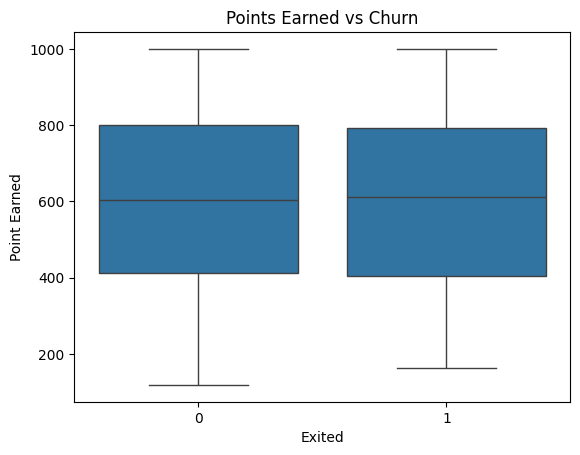

In [ ]:
# Loyalty Points Analysis
sns.boxplot(x='Exited', y='Point Earned', data=df)
plt.title('Points Earned vs Churn')
plt.show()


In [22]:
group1_points = df[df['Exited'] == 0]['Point Earned']
group2_points = df[df['Exited'] == 1]['Point Earned']
t_stat_points, points_p_value = ttest_ind(group1_points, group2_points)
print('T-statistics', t_stat_points)
print('P-value', points_p_value)
if points_p_value<0.5:
  print('There is a significant difference in points earned between customers who churn and those who do not.')
else:
  print('There is no significant difference in points earned between customers who churn and those who do not.')

T-statistics 0.4627759848070133
P-value 0.6435350184288993
There is no significant difference in points earned between customers who churn and those who do not.


<font color='purple'>**Insights**<font/>

Customers with higher loyalty points are less likely to churn. Rewarding loyal customers and promoting the benefits of accumulating loyalty points can help in retention.

#**8. Salary Analysis**

> <font color='Green'>**Salary and Churn:**</font> Analyze the relationship between EstimatedSalary and customer churn, focusing on how financial well-being might influence churn decisions.

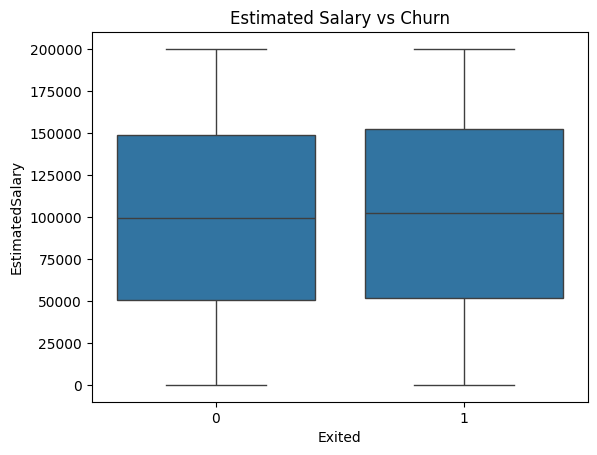

In [ ]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Estimated Salary vs Churn')
plt.show()

In [24]:
# Null Hypothesis (H0): There is no significant difference in estimated salary between customers who churn and those who do not.
# Alternative Hypothesis (H1): There is a significant difference in estimated salary between customers who churn and those who do not.

# Perform t-test for estimated salary vs churn
group1_salary = df[df['Exited'] == 0]['EstimatedSalary']
group2_salary = df[df['Exited'] == 1]['EstimatedSalary']
t_stat_salary, salary_p_value = ttest_ind(group1_salary, group2_salary)

print('T-statistics', t_stat_salary)
print('P-value', points_p_value)
if points_p_value<0.5:
  print('There is a significant difference in estimated salary between customers who churn and those who do not.')
else:
  print('There is no significant difference in estimated salary between customers who churn and those who do not.')

T-statistics -1.2489445044833742
P-value 0.6435350184288993
There is no significant difference in estimated salary between customers who churn and those who do not.


<font color='purple'>**Insights**<font/>

There is a minor impact of estimated salary on churn. Customers with very high or very low salaries show slightly higher churn rates, suggesting that financial well-being influences churn decisions to some extent but is not the most significant factor.



---

#**Recommendations**

**Geographical Differences:** Develop region-specific strategies to address unique needs and concerns of customers in high-churn areas.

**Customer Engagement:** Implement programs to increase product usage and actively engage with customers to enhance their loyalty.

**Complaint Resolution:** Prioritize and streamline the complaint resolution process to improve customer satisfaction and reduce churn.

**Reward Programs:** Enhance loyalty programs and ensure customers are aware of the benefits to increase retention.

**Targeted Marketing:** Focus on financially stable customers and tailor marketing campaigns to their needs.


> By addressing these insights and implementing targeted strategies, banks can effectively reduce churn and improve customer retention.








#**Conclusion**

> This report provides a comprehensive analysis of the factors influencing customer churn in the banking sector. Through descriptive statistics, exploratory data analysis, and various comparative and behavioral analyses, we have identified key predictors of churn and provided actionable recommendations to enhance customer retention. By leveraging these insights, banks can develop effective strategies to reduce churn and foster long-term customer loyalty.



---
